In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
def fa(x=1,y=1,**kwargs):
    fig,ax = plt.subplots(x,y,**kwargs)
    return fig,ax
%matplotlib notebook
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, optimizers

from tqdm import tqdm
import time
import collections
import pandas as pd

In [2]:
#generate some data that shows clear non-linearities.
def data_fun(N=1000,noise=.4):
    '''
    Generates data according to logit function (inverse of a sigmoidal function) with
    some Gaussian noise. Splits this to train and test sets.
    '''
    def logit_transform(p):
        return np.log(p/(1-p))
    x = np.random.rand(N)
    y = logit_transform(x) + np.random.randn(N)*noise
    x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size=0.25,
                                                    random_state=42)
    return x_train, x_test, y_train, y_test

def linear_model(activation='linear',units=1):
    OPTIMIZER = tf.keras.optimizers.SGD()#tf.keras.optimizers.Adam()
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(1,)))
    
    model.add(tf.keras.layers.Dense(units, 
                                    activation=activation,
                                    kernel_initializer = tf.random_normal_initializer))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=OPTIMIZER,loss='mse',metrics=[])
    return model

def plot_dataset(x,y,**kwargs):
    plt.scatter(x,y,alpha=0.3,marker='.',**kwargs)

def train_N_times(N,model,verbose = False):
    iter  = 0
    Res   = collections.defaultdict(list)
    for iter in range(N):
        x_train, x_test, y_train, y_test = data_fun()
        # Training the model.
        H = model.fit(x_train,y_train,
                  batch_size=100, 
                  epochs=1000,
                  verbose=verbose, 
                  validation_split=0.2)
        Res['loss'].append(H.history['loss'][-1])
        Res['val_loss'].append(H.history['val_loss'][-1])
        Res['test_loss'].append(model.evaluate(x_test, y_test, batch_size=200,verbose=False))
    df = pd.DataFrame.from_dict(Res)
    df['train-test'] = df['loss'] - df['val_loss']
    return df

# Linear Regression

## Single-parameter model

Without a bias parameter, amounts to a slope without intercept. Given the symmetrical data structure the resulting line is nearly horizontal.

In [31]:
x_train, x_test, y_train, y_test = data_fun()
activation = 'relu'
verbose = False
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.05)#tf.keras.optimizers.Adam()

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1, activation='relu', use_bias=False))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=OPTIMIZER,loss='mse',metrics=[])

H = model.fit(x_train,y_train-np.mean(y_train),
          batch_size=100,
          epochs=100,
          verbose=verbose,
          validation_split=0.2)

<IPython.core.display.Javascript object>


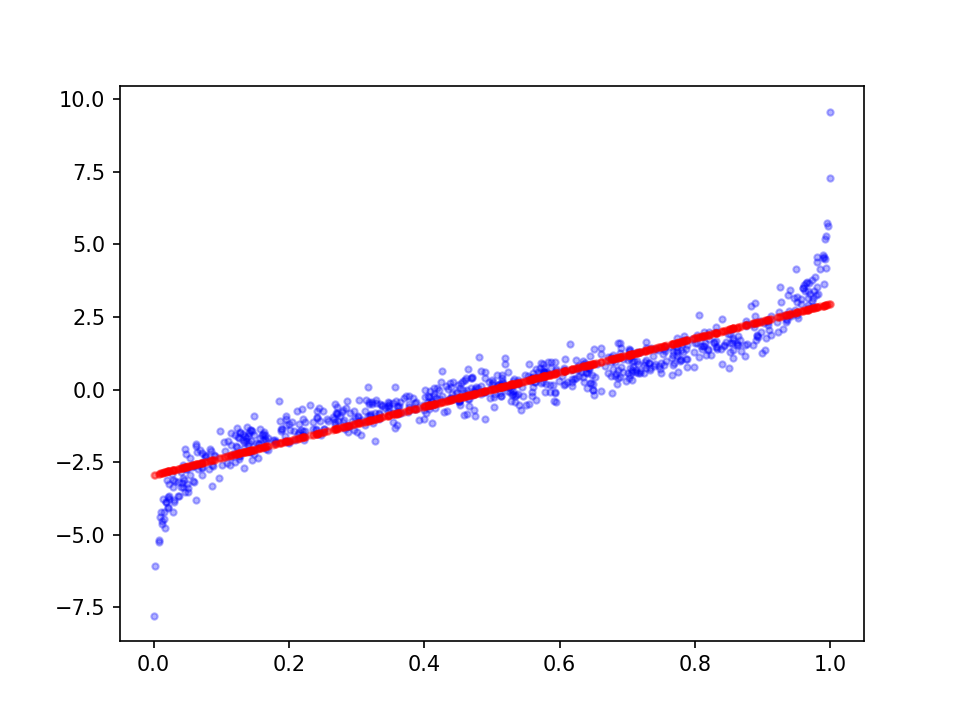

24/24 [==============================] - 0s 925us/step


<IPython.core.display.Javascript object>


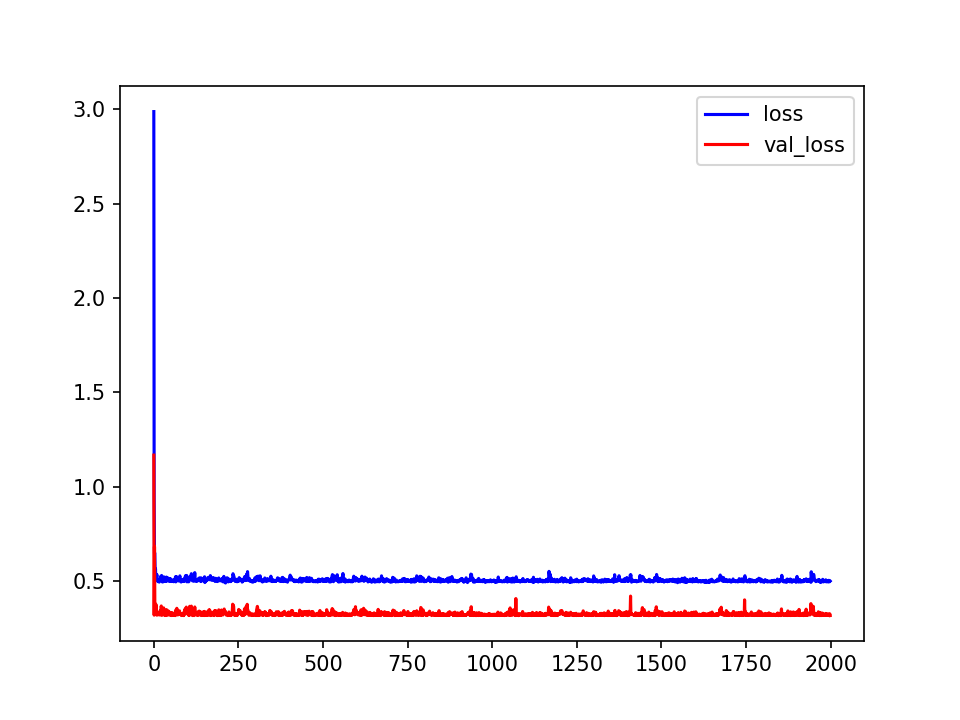

loss        0.501041
val_loss    0.318143
Name: 1999, dtype: float64


In [42]:
f,a = fa()
plot_dataset(x_train, y_train, color='b')
plot_dataset(x_train, model.predict(x_train), color='r')

f,a= fa()
a.plot(H.epoch,H.history["loss"],'b')
a.plot(H.epoch,H.history["val_loss"],'r')
a.legend(['loss','val_loss'])

print(pd.DataFrame(H.history).iloc[-1])

## 2 parameter regression

The following shows how to implement a simple linear regression model with TF Keras api. It also shows that how training and test losses are connected to each other.

Note that validation loss is smaller than training loss. Can you produce any hypothesis on why this is the case?

<IPython.core.display.Javascript object>


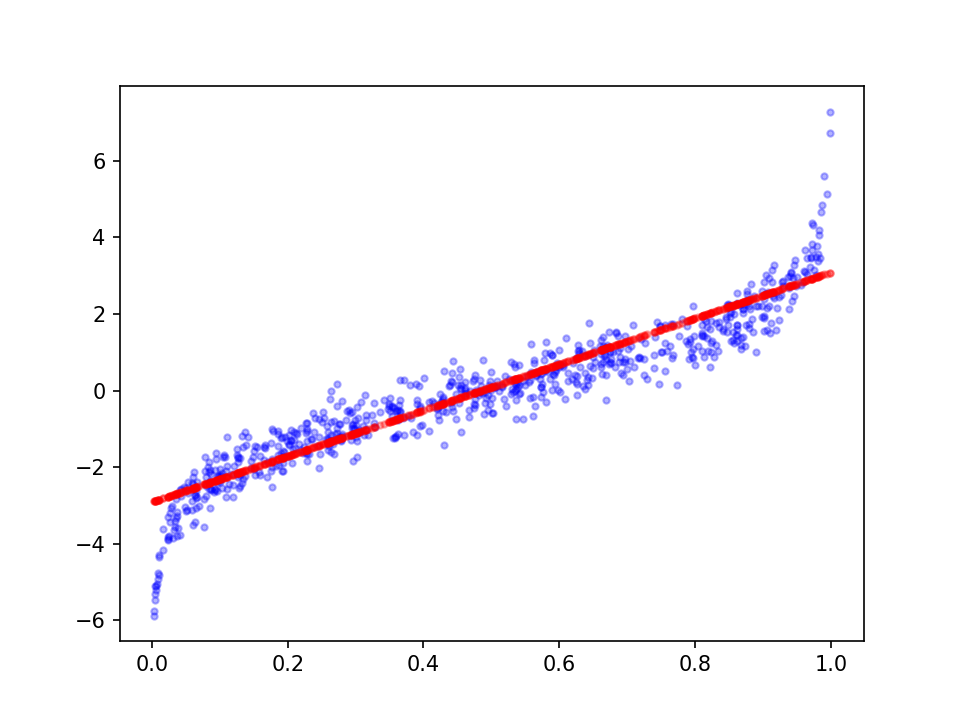

24/24 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>


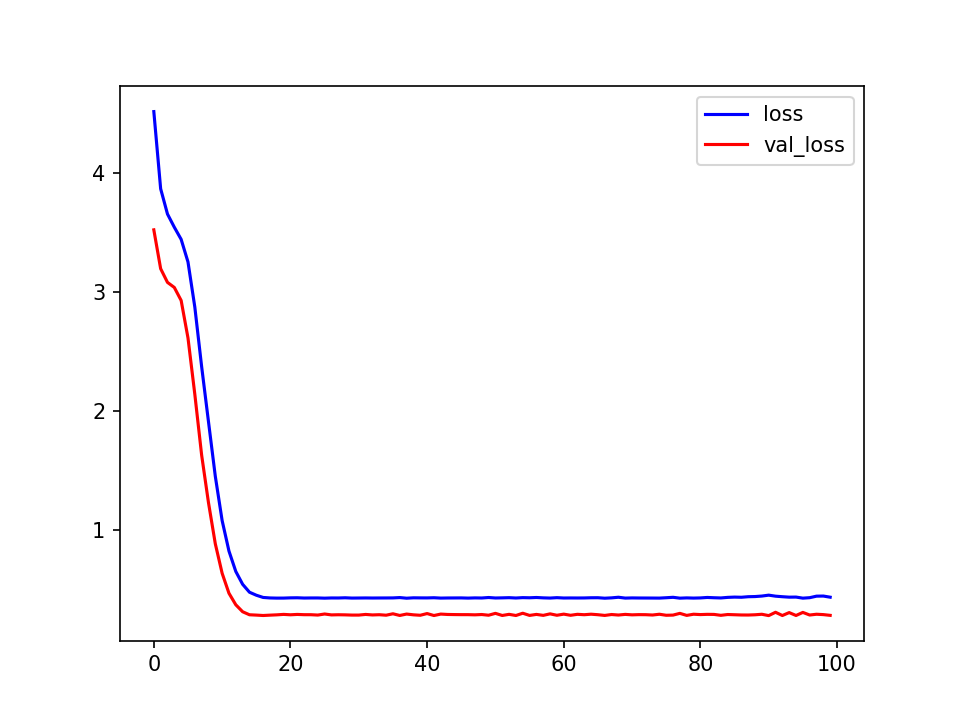

loss        0.432236
val_loss    0.279622
Name: 99, dtype: float64


In [43]:
x_train, x_test, y_train, y_test = data_fun()
activation = 'relu'
verbose = False
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.05)#tf.keras.optimizers.Adam()

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(2, activation='linear', use_bias=False))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=OPTIMIZER,loss='mse',metrics=[])

H = model.fit(x_train,y_train-np.mean(y_train),
          batch_size=100,
          epochs=100,
          verbose=verbose,
          validation_split=0.2)

f,a = fa()
plot_dataset(x_train, y_train, color='b')
plot_dataset(x_train, model.predict(x_train), color='r')

f,a= fa()
a.plot(H.epoch,H.history["loss"],'b')
a.plot(H.epoch,H.history["val_loss"],'r')
a.legend(['loss','val_loss'])
print(pd.DataFrame(H.history).iloc[-1])

## 20 unit middle layer


Note that having activation function linear cannot generate the piecewise linearity in the model.

<IPython.core.display.Javascript object>


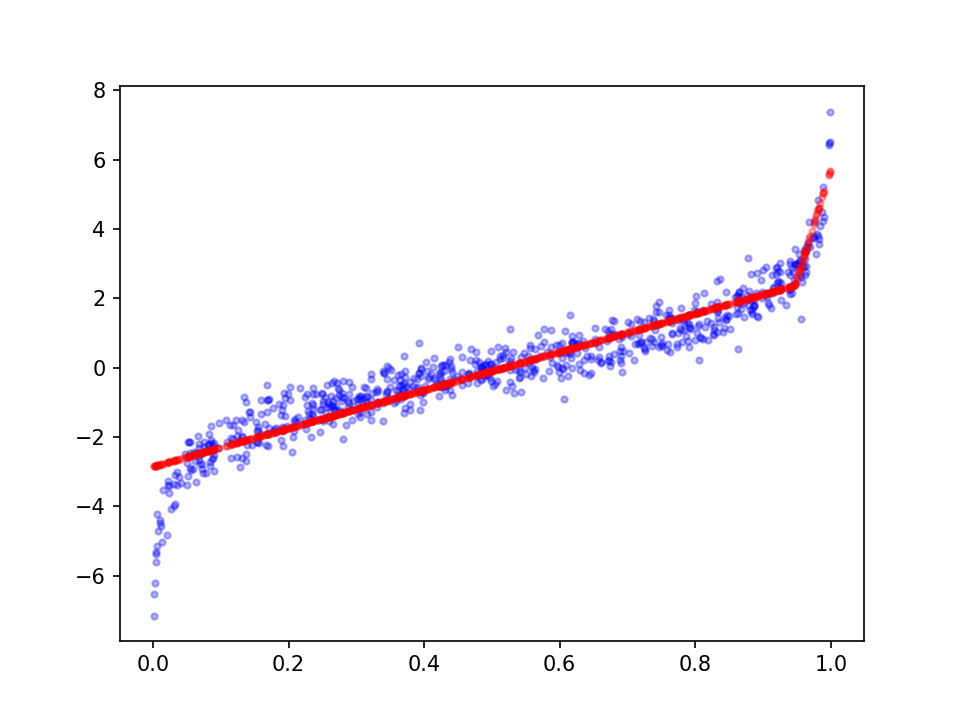

24/24 [==============================] - 0s 843us/step


<IPython.core.display.Javascript object>


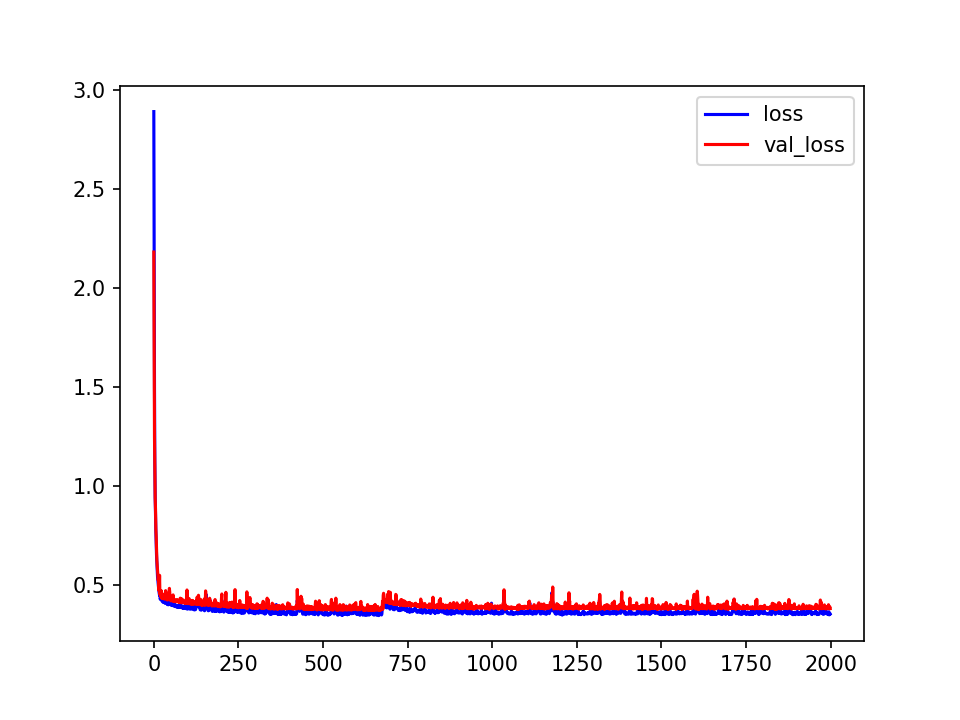

loss        0.355987
val_loss    0.383044
Name: 1999, dtype: float64

In [45]:
x_train, x_test, y_train, y_test = data_fun()
activation = 'relu'
verbose = False
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.05)#tf.keras.optimizers.Adam()

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=OPTIMIZER,loss='mse',metrics=[])

H = model.fit(x_train,y_train-np.mean(y_train),
          batch_size=100,
          epochs=2000,
          verbose=verbose,
          validation_split=0.2)

f,a = fa()
plot_dataset(x_train, y_train, color='b')
plot_dataset(x_train, model.predict(x_train), color='r')

f,a= fa()
a.plot(H.epoch,H.history["loss"],'b')
a.plot(H.epoch,H.history["val_loss"],'r')
a.legend(['loss','val_loss'])
pd.DataFrame(H.history).iloc[-1]